# ECE 462 - Homework #6


# Problem 5.2.5

The number of states up to $k_{max}$ is defined as:

$$N=\frac{a^2}{\pi}\int_{0}^{k_{max}}k\cdot dk$$

The number of states is $N=J\cdot a^2$:

$$J\cdot a^2=\frac{a^2}{\pi}\int_{0}^{k_{max}}k\cdot dk$$

$$J=\frac{1}{\pi}\int_{0}^{k_{max}}k\cdot dk$$

$$J=\frac{1}{2\pi}k^2|_{0}^{k_{max}}$$

$$J=\frac{k_{max}^2}{2\pi}$$

From here, the $k_{max}$ can be found, which is analogous to the fermi-energy (as it is the maximum state available):

$$k_{max}=\sqrt{2\cdot J\cdot \pi}$$

# Problem 5.2.6

The eigenenergies of a two-dimensional well are:

$$E_{n,m}=\frac{\hbar^2}{2m}(\frac{n^2}{a^2}+\frac{m^2}{b^2})$$

Therefore the density of these states are simply $\rho=\frac{E_{n,m}}{a\cdot b}$:

$$\rho=\frac{\hbar^2}{2mab}(\frac{n^2}{a^2}+\frac{m^2}{b^2})$$

# Problem 5.3.1 

$$n_C(E)=g_c(E)f_F(E)$$

$$n_C(E)=\frac{4\pi (2m_n^*)^{3/2}\sqrt{E-E_c}}{h^3}\cdot \frac{1}{1+e^{\frac{E-E_F}{k_BT}}}$$

Where the problem states $E_c-E_f=0.5$ and $E-E_c=0.2$, which means the two required energy statements can be evaluated as:

$$E-E_c=0.2eV$$

$$E_c-E_F=0.5eV\rightarrow E-0.2-E_f=0.5\rightarrow E-E_f=0.7eV$$

These can be substituted into the equal for $n_C(E)$ as follows:

## Part (a)

For a temperature of 300 K:

$$n_C(E)=\frac{4\pi \cdot(2\cdot 1.08\cdot 9.109\cdot 10^{-31})^{3/2}\sqrt{0.2}}{(4.135\cdot 10^{-15})^3}\cdot \frac{1}{1+e^{\frac{0.7}{8.62\cdot 10^{-5}\cdot300}}}$$

$$n_C(E)=P(E)=3.85\cdot 10^{-13}$$

## Part (b)

For a temperature of 310 K:

$$n_C(E)=\frac{4\pi  \cdot(2\cdot 1.08\cdot 9.109\cdot 10^{-31})^{3/2}\sqrt{0.2}}{(4.135\cdot 10^{-15})^3}\cdot \frac{1}{1+e^{\frac{0.7}{8.62\cdot 10^{-5}\cdot310}}}$$

$$n_c(E)=P(E)=9.216\cdot 10^{-13}$$

# Problem 5.4.1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp


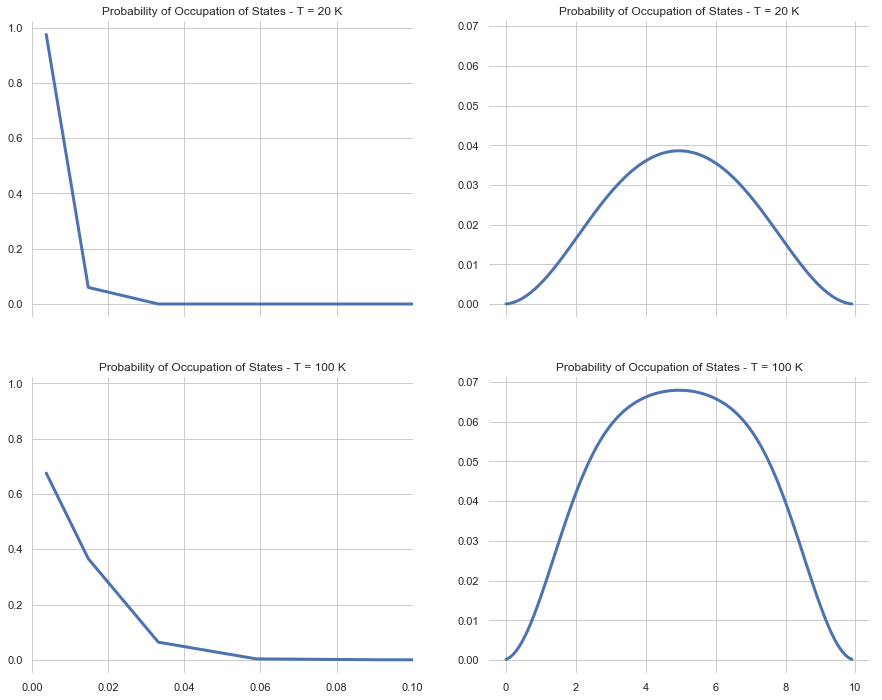

In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

NN = 100
hbar = 1.054e-34
m0 = 9.11e-31
melec = m0
ecoul = 1.6e-19
eV2J = 1.6e-19
J2eV = 1/eV2J
hbar_ev = hbar * J2eV

del_x = .1e-9
DX = del_x * 1e9
XX = np.arange(0, DX * NN, DX)

chi0 = hbar ** 2 / (2 * melec * del_x ** 2)

# Create H matrix
V = np.zeros((NN))
H = np.zeros((NN, NN))
for diag in range(NN):
    H[diag, diag] = 2 * chi0 + V[diag] # Assign diagonals
    try:
        H[diag, diag + 1] = -chi0      # Assign col+1
    except IndexError:
        pass
    try:
        H[diag, diag - 1] = -chi0      # Assign col-1
    except IndexError:
        pass
    H[0, NN-1] = 0
    
# Get eigenfunctions
eps, phi = la.eig(H)
indices = np.argsort(eps)

E = [J2eV * eps[indices][m] for m in range(NN)]

# Calculate particle density
kB = 8.62e-5; EF = 0.01; F = np.zeros((NN)); rho = np.zeros((NN)); ndens = np.zeros((NN)); n_elec = 0.0
temps = [20, 100]

sns.set(style='whitegrid')
f, axes = plt.subplots(len(temps), 2, figsize=(15, 12), sharey='col', sharex='col')
[ax[0].set_xlim((0, 0.1)) for ax in axes]
sns.despine(left=True, right=True, top=True, bottom=True)
for i, (T, ax) in enumerate(zip(temps, axes)):

    for n in range(NN):
        F[n] = 1.0 / (1 + np.exp((E[n] - EF) / (kB * T)))
        n_elec += 2 * F[n]
        for k in range(NN):
            rho[k] += 2 * F[n] * phi[k, n] * np.conj(phi[k, n])
            ndens[k] += 2 * F[n] * phi[k, n] * np.conj(phi[k, n])
        
    sns.lineplot(E, F, ax=ax[0], lw=3).set_title('Probability of Occupation of States - T = {} K'.format(T))
    sns.lineplot(XX, ndens, ax=ax[1], lw=3).set_title('Probability of Occupation of States - T = {} K'.format(T))